<a href="https://colab.research.google.com/github/usmanjoyia123/machine-learning/blob/master/Twitter_HateSpeech_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
nltk.download('words')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

ps = nltk.PorterStemmer()
tweets= pd.read_csv(r'/content/Tokenized.csv', encoding = 'UTF-8')
tweets.tokens=tweets.tokens.astype(str)
tweets.head(5)
#text = tweets['text']
tkns = []
for name, values in tweets.text.iteritems():
   tmp = '{value}'.format(name=name, value=values)
   tmp = word_tokenize(tmp)
   tkns.append(tmp)
print (tkns)

In [ ]:
#For roman stop words(rsw) removal 
rsw = ['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh ', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye ', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou', 'nahi', 'nhi', 'nh', 'ney', 'nai', 'nay', 'chi', 'ni', 'na', 'k', 'ye', 'to', 'hai', 'kisi', 'sy', 'hain', 'or', 'tak', 'ek', 'aik', 'kiya', 'liya', 'diya', 'dete', 'unhon', 'unhen', 'sey', 'kiye', 'mujhe', 'mjhe', 'bana', 'hue', 'aur', 'wo', 'woh', 'ai', 'aisa', 'waisa', 'mera', 'mere', 'mery', 'meri', 'muzhe', 'mai', 'hum', 'khud', 'acha', 'per', 'har', 'tag', 'bat', 'baat', 'pr', 'he', 'hamara', 'jahan', 'tumhara', 'apka', 'apke', 'wale', 'walon', 'lekin', 'lakin', 'kitna', 'ke', 'hota', 'hon', 'kab', 'kb', 'kabhi', 'sirf', 'hoti', 'hote', 'magar', 'app', 'agar', 'agr', 'pta', 'jab', 'inhe', 'inho', 'in', 'sath', 'esa', 'kaha', 'key', 'kahan', 'jis', 'kia', 'ayi', 'hy', 'main', 'mein', 'me', 'hein', 'hn', 'ki', 'tha', 'ta', 'koi', 'ko', 'woh ', 'bhi', 'yeh', 'raha', 'rha', 'hota', 'ho', 'ga', 'ka', 'leye', 'lye', 'kr', 'kar', 'kry', 'ker', 'lye', 'liye', 'liya', 'hotay', 'waisay', 'gya', 'gaya', 'gae', 'kch', 'kuch', 'ab', 'thy', 'thay', 'houn', 'hain', 'bad', 'baad', 'hai', 'ha', 'sakta', 'han', 'hn', 'hon', 'hoga', 'jin', 'unhen', 'thein', 'hoi', 'to', 'toh', 'is', 'isi', 'iss', 'rahe', 'hi', 'h', 'jo', 'a', 'kya', 'kyun', 'thi', 'se', 'pe', 'phr', 'phir', 'wala', 'waly', 'wale', 'wali', 'waisay', 'us', 'ny', 'hun', 'hu', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'use', 'unke', 'unki', 'kon', 'un', 'ne', 'ul', 'haan', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'ata', 'aye', 'ya', 'dono', 'dy', 'do', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'karta', 'karne', 'karte', 'karti', 'lg', 'lag', 'rahi', 'raha', 'hui', 'hua', 'karna', 'krna', 'gi', 'ge', 'ji', 'hova', 'yehi', 'liya', 'jana', 'di', 'jye', 'chal', 'be', 'mil', 'tu', 'tum', 'aap', 'ap', 'apne', 'apko', 'apki', 'apny', 'apnay', 'apna', 'apni', 'hum', 'hm', 'par', 'hay', 'kis', 'the', 'sb', 'b', 'kr', 'gy', 'tori', 'dain', 'krny', 'tou', 'tu', 'tera', 'teri', 'kay', 'ye', 'iss', 'mien', 'karo', 'kare', 'kro', 'kiya', 'kiye', 'kar', 'ker', 'karta', 'ke', 'ik', 'ky', 'e', 'ye', 'firse', 'phirse', 'sub', 'sab', 'usme', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now', 'imran', 'khan', 'nawaz', 'bilawal', 'maryam', 'shareef', 'niazi', 'zardari',  'asif']
sw = (stopwords.words('english')) # nltk english stopwords list
sw.extend(rsw) #Adding roman words to stopwords list

# print (sw)
#stop word removal
tokens = []
for words in tkns:
  tk = [word for word in words if not word in sw]
  #tk = (" ").join(tk)
  tokens.append(tk)
  print (tk)

In [ ]:
print (tokens)
dict = {'sw': tokens}         
df = pd.DataFrame(tokens, columns = ['text']) 
# saving the dataframe 
#df.to_csv('out.csv', index=False) 
#tokens_without_sw.to_csv('out.csv', index=False)  

In [ ]:
tkns = []
for name, values in df.text.iteritems():
   tmp = '{value}'.format(name=name, value=values)
   tmp = word_tokenize(tmp)
   tkns.append(tmp)
print (tkns)


In [ ]:
print(type(tkns))
dict = {'sw': tkns}         
df = pd.DataFrame(dict) 
# saving the dataframe 
df.to_csv('out1.csv', index=False) 
tweets['updated_tokens'] = df
tweets.to_csv("fsw.csv", index=False)

In [ ]:
import string 
import re
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
nltk.download('words')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


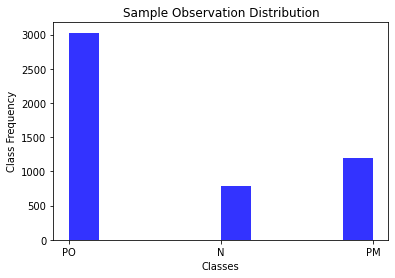

Max:  3028
(9084, 3)


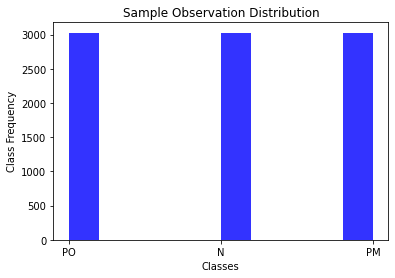

Index(['text', 'Label', 'location '], dtype='object')


In [ ]:
tokens= pd.read_csv(r'/content/tokentext1.csv', encoding = 'UTF-8')
tokens.head(5)
import matplotlib.pyplot as plt
def frequencyPlot(x):
  n, bins, patches = plt.hist(x, facecolor='blue', alpha=0.8)
  plt.xlabel('Classes')
  plt.ylabel('Class Frequency')
  plt.title('Sample Observation Distribution')
  plt.show()

def smoteBalance(x, label):
  max_size = x[label].value_counts().max()
  print ("Max: ", max_size)
  lst = [tokens]
  ##Deal with class imbalance
  for class_index, group in x.groupby(label):
    lst.append(group.sample(max_size-len(group), replace=True))
  data_new = pd.concat(lst)
  return data_new


frequencyPlot(tokens.Label)
data_new = smoteBalance(tokens, 'Label')
print (data_new.shape)
frequencyPlot(data_new.Label)
print (data_new.columns)

In [ ]:

#reading the mapped file to convert the unified tweets into tokens. Stop words already removed.

tokens = data_new
tkns = []
for name, values in tokens.text.iteritems():
   tmp = '{value}'.format(name=name, value=values)
   preprocess(tmp)
   tmp = word_tokenize(tmp)
   tkns.append(tmp)
print (tkns)
print (type(tkns))

nltk.download('wordnet')
nltk.download('omw-1.4')

#lemmatize the english words in roman tweets
updated_tkns = []
updated_txt = []
lbls = []
wn = nltk.WordNetLemmatizer()
for words in tkns:
  tk = [wn.lemmatize(word)  for word in words if len(word)>2]
  if tk is not 'nan':
    #if len(tk)>2:
      updated_txt.append(" ".join(tk))
      updated_tkns.append(tk)
      print (tk)

#saving the lemmatize tokens into file. 
dict = {'lemma': updated_tkns, 'text':updated_txt}         
df_lemma = pd.DataFrame(dict) 
# saving the dataframe 
del dict
df_lemma.to_csv('lemma.csv', index=False)

[['begheret', 'youthia'], ['zda', 'bol', 'smjhy', 'bh', 'kitny', 'tameez', 'dar', 'nawaz', 'shareef', 'trhn', 'shareef', 'mashallah'], ['may', 'supreme', 'court', 'rukni', 'bench', 'nawaz', 'shareef', 'hakumat', 'bahal', 'den'], ['abay', 'nawazz', 'shareeef', 'way', 'saliya'], ['youthia', 'den', 'pary'], ['certified', 'youthia'], ['din', 'akhri', 'pk', 'badlne', 'beshrm', 'youthia'], ['imran', 'corrupt', 'nawaz', 'bara', 'nehi'], ['imran', 'khan', 'dor', 'hakumat', 'corrupt', 'barhi', 'lekn', 'chor', 'nawaz', 'shareef'], ['including', 'shahbaz', 'nikala', 'tmhra', 'maan', 'jaoga'], ['nro', 'nro', 'plus', 'nawaz', 'shareef', 'bhaga'], ['transparency', 'international', 'nawaz', 'shareef', 'paisa', 'pakar', 'last', 'hope', 'youthia', 'brigade'], ['years', 'rule', 'konsa', 'idara', 'mazboot', 'nawaz', 'shareef', 'idaray', 'naam', 'bataein', 'please'], ['youthia', 'yaawr', 'banda', 'lakh', 'phone', '78k'], ['zardari', 'nawaz', 'mill', 'sari', 'sugar', 'control', 'r', 'cartel', 'cheeni', 'po

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Streaming output truncated to the last 5000 lines.
['sir', 'awam', 'comparison', 'faraq', 'parta', 'faraq', 'parta', 'pakistan', 'tootey', 'chor', 'hath', 'ba', 'mehangaai', 'garz', 'hey', 'nawaz', 'shareef', 'hakumat', 'nikalta', 'awam', 'cheekh', 'cheekh', 'mehangai', 'hey', 'game', 'hen']
['sir', 'jawad', 'sahab', 'kashmir', 'farooosh', 'ghadar', 'wattan', 'corrupt', 'niazi', 'mafia', 'crushed', 'everything', 'lovely', 'peaceful', 'growing', 'pakistan', 'every', 'moment', 'corrupt', 'niazi', 'worse', 'disaster', 'pakistan']
['sir', 'pressure', 'log', 'chupney', 'jagah', 'dhoond', 'chor', 'looteron', 'aukaat', 'imran', 'sir', 'saamney', 'kharay']
['sir', 'kyaa', 'hisab', 'daily', 'wage', 'kaa', 'kitnay', 'halaat', 'tang', 'bilawal', 'haq', 'tweet', 'prr']
['sir', 'kyaa', 'peer', 'sahab', 'nawaz', 'shareef', 'elaj', 'sktyy']
['sir', 'bhutto', 'babi', 'hazar', 'lakan', 'zardari', 'leage', 'manata', 'mana', 'bhutto', 'nam', 'sindh', 'tabah', 'daya']
['sir', 'pehlay', 'pehle', 'youthia',

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

print (tokens.Label.isnull().values.any())
print (df_lemma.isnull().values.any())
X_train, X_test, y_train, y_test = train_test_split(df_lemma["text"], tokens["Label"],test_size=0.3,shuffle=True)

#for word2vec tokens of training and testing dataset
X_train_tokens= [nltk.word_tokenize(i) for i in X_train]  
X_test_tokens= [nltk.word_tokenize(i) for i in X_test]

False
False


In [ ]:
#converting the text tokens into numerical vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = vec.fit_transform(X_train) 
X_test_vectors_tfidf = vec.transform(X_test)

#EDA for tfidf vectorsss
#feature_names = vec.get_feature_names()
#first_vec = tfidf[2]
#dfn = pd.DataFrame(first_vec.T.todense(), index=feature_names, columns=["tfidf"]) 
#dfn.sort_values(by=["tfidf"],ascending=False)

In [ ]:
import gensim
from gensim.models import Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
    def fit(self, X, y):
        return self
    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [ ]:
#building Word2Vec model

model = Word2Vec(df_lemma['lemma'],min_count=1)     
zipped = zip(model.wv.index2word, model.wv.vectors)

w2v = dict(zipped)
modelw = MeanEmbeddingVectorizer(w2v)
# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw.transform(X_train_tokens)
X_test_vectors_w2v = modelw.transform(X_test_tokens)

In [ ]:
#enough of processing, let's do fun stuff
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from xgboost import XGBClassifier
rf = RandomForestClassifier()
print (X_train_vectors_tfidf)
# fit model no training data
xg = XGBClassifier()
rf.fit(X_train_vectors_w2v, y_train)

y_predict = rf.predict(X_test_vectors_w2v)
y_prob = rf.predict_proba(X_test_vectors_w2v)[:,1]
print ("Random Forest accuracy with w2v:", accuracy_score(y_test, y_predict)*100)
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

  (0, 1361)	0.2494544713041629
  (0, 5213)	0.2027346920031256
  (0, 10920)	0.23506544399320659
  (0, 7353)	0.5125718952084013
  (0, 8661)	0.6474623065029584
  (0, 10351)	0.21198893484363193
  (0, 9163)	0.25628594760420065
  (0, 7641)	0.0682327658168433
  (0, 7333)	0.21023904627550782
  (1, 11412)	0.42011669322596806
  (1, 639)	0.5385397983629027
  (1, 6215)	0.5264895844476152
  (1, 1080)	0.3800552423302219
  (1, 6971)	0.3002409319564144
  (1, 7641)	0.14730567767591154
  (2, 2201)	0.10581235840293639
  (2, 6240)	0.3053395977840564
  (2, 2751)	0.17496737458139103
  (2, 544)	0.21771525784945037
  (2, 5892)	0.2873265436083604
  (2, 514)	0.31963736324237757
  (2, 730)	0.15689608318609294
  (2, 8021)	0.18349788588023366
  (2, 8943)	0.22785968388322408
  (2, 3414)	0.18911972693280793
  :	:
  (6355, 2461)	0.20490674422076208
  (6355, 3242)	0.23848455621665982
  (6355, 7108)	0.22254208469144252
  (6355, 3310)	0.2123810415970724
  (6355, 9745)	0.20718702046635276
  (6355, 1064)	0.246680113503023

In [ ]:
xg = XGBClassifier()
xg.fit(X_train_vectors_w2v, y_train)

y_predict = xg.predict(X_test_vectors_w2v)
y_prob = xg.predict_proba(X_test_vectors_w2v)[:,1]
print ("XGBoost accuracy with w2v:", accuracy_score(y_test, y_predict)*100)
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

XGBoost accuracy with w2v: 66.14086573734409
              precision    recall  f1-score   support

           N       0.57      0.75      0.64       897
          PM       0.93      0.55      0.69       898
          PO       0.63      0.69      0.66       931

    accuracy                           0.66      2726
   macro avg       0.71      0.66      0.66      2726
weighted avg       0.71      0.66      0.66      2726

Confusion Matrix: [[669  15 213]
 [243 494 161]
 [268  23 640]]


In [ ]:
rf.fit(X_train_vectors_tfidf, y_train)

y_predict = rf.predict(X_test_vectors_tfidf)
y_prob = rf.predict_proba(X_test_vectors_tfidf)[:,1]
print ("Random Forest accuracy with tfidf:", accuracy_score(y_test, y_predict)*100)
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

Random Forest accuracy with tfidf: 90.46221570066031
              precision    recall  f1-score   support

           N       0.83      0.97      0.89       897
          PM       0.97      0.91      0.94       898
          PO       0.94      0.83      0.88       931

    accuracy                           0.90      2726
   macro avg       0.91      0.91      0.91      2726
weighted avg       0.91      0.90      0.90      2726

Confusion Matrix: [[872  11  14]
 [ 46 817  35]
 [136  18 777]]


In [ ]:
xg.fit(X_train_vectors_tfidf, y_train)

y_predict = xg.predict(X_test_vectors_tfidf)
y_prob = xg.predict_proba(X_test_vectors_tfidf)[:,1]
print ("XGBoost accuracy with tfidf:", accuracy_score(y_test, y_predict)*100)
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

XGBoost accuracy with tfidf: 75.09170946441672
              precision    recall  f1-score   support

           N       0.61      0.94      0.74       897
          PM       0.90      0.61      0.73       898
          PO       0.90      0.70      0.79       931

    accuracy                           0.75      2726
   macro avg       0.80      0.75      0.75      2726
weighted avg       0.80      0.75      0.75      2726

Confusion Matrix: [[844  18  35]
 [311 550  37]
 [236  42 653]]


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(64, ), random_state=1)
mlp.fit(X_train_vectors_tfidf, y_train)

y_predict = mlp.predict(X_test_vectors_tfidf)
y_prob = mlp.predict_proba(X_test_vectors_tfidf)[:,1]
print ("MLP accuracy with tfidf:", accuracy_score(y_test, y_predict)*100)
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

MLP accuracy with tfidf: 90.02201027146002
              precision    recall  f1-score   support

           N       0.85      0.96      0.90       897
          PM       0.91      0.92      0.92       898
          PO       0.94      0.82      0.88       931

    accuracy                           0.90      2726
   macro avg       0.90      0.90      0.90      2726
weighted avg       0.90      0.90      0.90      2726

Confusion Matrix: [[858  16  23]
 [ 46 829  23]
 [100  64 767]]


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(64, ), random_state=1)
mlp.fit(X_train_vectors_w2v, y_train)

y_predict = mlp.predict(X_test_vectors_w2v)
y_prob = mlp.predict_proba(X_test_vectors_w2v)[:,1]
print ("MLP accuracy with w2v:", accuracy_score(y_test, y_predict)*100)
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

MLP accuracy with w2v: 60.858400586940576
              precision    recall  f1-score   support

           N       0.50      0.73      0.59       897
          PM       0.93      0.52      0.66       898
          PO       0.59      0.58      0.59       931

    accuracy                           0.61      2726
   macro avg       0.67      0.61      0.61      2726
weighted avg       0.67      0.61      0.61      2726

Confusion Matrix: [[651  18 228]
 [278 464 156]
 [369  18 544]]


In [ ]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import AveragePooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras import regularizers
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer()
X = df_lemma['text']
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1
X_train_encoded = tokenizer.texts_to_sequences(X_train_tokens)

X_test_encoded = tokenizer.texts_to_sequences(X_test_tokens)

In [ ]:
y_train = y_train.replace('N', 0)
y_train = y_train.replace('PM', 1)
y_train = y_train.replace('PO', 2)

y_test = y_test.replace('N', 0)
y_test = y_test.replace('PM', 1)
y_test = y_test.replace('PO', 2)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=3)
y_test_ = to_categorical(y_test, num_classes=3)
print (y_train)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
max_words = 200
X_train = sequence.pad_sequences(X_train_encoded, maxlen=max_words)
X_test = sequence.pad_sequences(X_test_encoded, maxlen=max_words)

print (X_train.shape)
print (X_test.shape)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.2,shuffle=True)

print (X_train.shape)
print (y_train.shape)
print (X_val.shape)
print (y_val.shape)

(6358, 200)
(2726, 200)
(5086, 200)
(5086, 3)
(1272, 200)
(1272, 3)


In [ ]:
max_words = 200
# Building the CNN Model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_words))  #embeddings_regularizer = regularizers.l2(0.0005)
#model.add(Dense(250, activation='relu'))
#model.add(MaxPooling1D())
model.add(Conv1D(128, 8, padding='same', activation='relu'))
model.add(MaxPooling1D())
#model.add(Dropout(0.2))
model.add(Conv1D(64, 8, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(32, 8, padding='same', activation='relu'))
model.add(MaxPooling1D())
#model.add(Conv1D(16, 8, padding='valid', activation='relu'))
#model.add(MaxPooling1D())
model.add(Flatten())
#model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  #kernel_regularizer = regularizers.l2(0.0005)



#from tensorflow.keras.callbacks import ModelCheckpoint
#es=tf.keras.callbacks.EarlyStopping( monitor="val_loss", patience=3,
#                                     verbose=1,  restore_best_weights=True)
#rlronp=tf.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.5, patience=1,
#                                             verbose=1)
#callback_list=[es, rlronp]



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 200, 100)          1379900   
                                                                 
 conv1d_47 (Conv1D)          (None, 200, 128)          102528    
                                                                 
 max_pooling1d_57 (MaxPoolin  (None, 100, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_48 (Conv1D)          (None, 100, 64)           65600     
                                                                 
 max_pooling1d_58 (MaxPoolin  (None, 50, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_49 (Conv1D)          (None, 50, 32)          

In [ ]:
#print (y_test_)
#import keras.callbacks
#from keras.callbacks import TensorBoard

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=32, verbose=2)  
#2 batch_size=128, validation_split=0.2 callbacks=callback_list

# Getting score metrics from our model
scores = model.evaluate(X_test, y_test_, verbose=2)

Epoch 1/40
159/159 - 3s - loss: 0.7482 - accuracy: 0.6540 - val_loss: 0.4768 - val_accuracy: 0.8208 - 3s/epoch - 16ms/step
Epoch 2/40
159/159 - 1s - loss: 0.2300 - accuracy: 0.9261 - val_loss: 0.3460 - val_accuracy: 0.8852 - 1000ms/epoch - 6ms/step
Epoch 3/40
159/159 - 1s - loss: 0.0719 - accuracy: 0.9797 - val_loss: 0.4075 - val_accuracy: 0.8868 - 987ms/epoch - 6ms/step
Epoch 4/40
159/159 - 1s - loss: 0.0297 - accuracy: 0.9923 - val_loss: 0.4430 - val_accuracy: 0.9002 - 990ms/epoch - 6ms/step
Epoch 5/40
159/159 - 1s - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.5183 - val_accuracy: 0.8844 - 935ms/epoch - 6ms/step
Epoch 6/40
159/159 - 1s - loss: 0.0194 - accuracy: 0.9945 - val_loss: 0.5409 - val_accuracy: 0.8994 - 1s/epoch - 6ms/step
Epoch 7/40
159/159 - 1s - loss: 0.0216 - accuracy: 0.9953 - val_loss: 0.5071 - val_accuracy: 0.9033 - 948ms/epoch - 6ms/step
Epoch 8/40
159/159 - 1s - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.5163 - val_accuracy: 0.8962 - 993ms/epoch - 6ms/step
Epoc

In [ ]:

print("Accuracy: %.2f%%" % (scores[1]*100))
y_pred = model.predict(X_test)
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test_, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Accuracy: 89.36%
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       918
           1       0.91      0.87      0.89       857
           2       0.89      0.86      0.88       951

    accuracy                           0.89      2726
   macro avg       0.89      0.89      0.89      2726
weighted avg       0.89      0.89      0.89      2726

Training Accuracy: 0.9972
Testing Accuracy:  0.8936


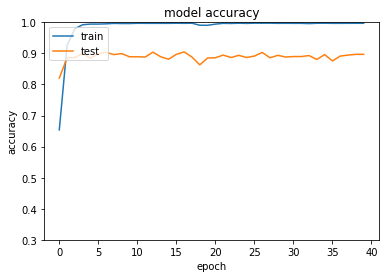

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.30, 1.0)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

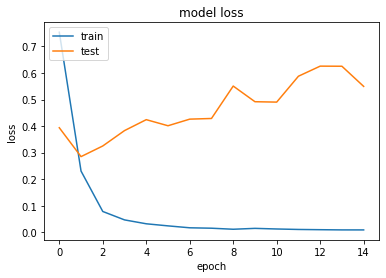

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()